In [7]:
%matplotlib inline
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

In [2]:
(train_data,train_label),(test_data,test_label) = \
    tf.keras.datasets.boston_housing.load_data()

In [5]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None,13],dtype=tf.float32)
    labels = tf.placeholder(shape=[None,],dtype=tf.float32)
    
    h1 = tf.keras.layers.Dense(64,activation=tf.nn.relu)(inputs)
    h2 = tf.keras.layers.Dense(16,activation=tf.nn.relu)(h1)
    output = tf.keras.layers.Dense(1,activation=None)(h2)
    
    loss = tf.reduce_mean(
            tf.keras.losses.mean_squared_error(labels,output))
    
    optim = tf.train.GradientDescentOptimizer(learning_rate=1e-6)
    train_op = optim.minimize(loss)

In [8]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    batch_size=32
    for epoch in range(200):
        order = np.argsort(np.random.random(train_label.shape))
        train_data = train_data[order]
        train_label = train_label[order]
        
        res_train_losses = []
        for i in range(train_label.shape[0] // batch_size):
            strat = i * batch_size
            end = (i+1) * batch_size
            res_train_loss,_=sess.run([loss,train_op],
                    feed_dict={inputs:train_data[strat:end],
                               labels:train_label[strat:end]})
            res_train_losses.append(res_train_loss)
        
        res_val_loss = sess.run(loss,
                    feed_dict={inputs:test_data,
                              labels:test_label})
        print('epoch %3d,train loss %2.4f,val loss %2.4f' %
             (epoch,res_train_loss,np.mean(res_train_losses)))

epoch   0,train loss 183.2567,val loss 592.7036
epoch   1,train loss 129.6781,val loss 146.2675
epoch   2,train loss 124.5386,val loss 113.6530
epoch   3,train loss 137.0158,val loss 106.9253
epoch   4,train loss 80.4298,val loss 100.1321
epoch   5,train loss 147.7521,val loss 102.7217
epoch   6,train loss 98.1497,val loss 99.5424
epoch   7,train loss 92.5988,val loss 101.3013
epoch   8,train loss 76.8141,val loss 96.6292
epoch   9,train loss 79.7729,val loss 97.1792
epoch  10,train loss 24.0248,val loss 97.3853
epoch  11,train loss 87.2493,val loss 94.0690
epoch  12,train loss 105.7246,val loss 99.1716
epoch  13,train loss 104.4983,val loss 96.6616
epoch  14,train loss 141.6758,val loss 96.6147
epoch  15,train loss 102.5627,val loss 93.5854
epoch  16,train loss 61.8436,val loss 94.7594
epoch  17,train loss 102.8741,val loss 97.2240
epoch  18,train loss 101.0247,val loss 93.0051
epoch  19,train loss 69.9889,val loss 88.2216
epoch  20,train loss 98.8365,val loss 94.3755
epoch  21,train 

epoch 191,train loss 95.3230,val loss 90.5598
epoch 192,train loss 99.1012,val loss 89.9415
epoch 193,train loss 128.0671,val loss 88.2394
epoch 194,train loss 79.3735,val loss 89.7935
epoch 195,train loss 68.1655,val loss 90.7225
epoch 196,train loss 86.3792,val loss 87.9441
epoch 197,train loss 79.5459,val loss 89.2163
epoch 198,train loss 75.1795,val loss 85.7807
epoch 199,train loss 132.5902,val loss 88.8765


===============================================================================================

导入Fashion_mnsit数据集,并可视化

In [ ]:
data = tf.keras.datasets.fashion_mnist.load_data()

 696320/4422102 [===>..........................] - ETA: 13s

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("./fasion_mnist",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./fasion_mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./fasion_mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./fasion_mnist\t10k-images-idx3-ubyte.gz
Extracting ./fasion_mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
(data.train.images[1]*255).astype(np.uint8).reshape([28,28])

array([[  0,   0,   0,   0,   0,   0,   0,  44,  55,  96, 201,  35,   0,
          0,   0,   0,   0,  60, 184,  53,  50,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  91, 104,  83,  44, 179, 243, 214,
        156, 148, 212, 248, 255, 184,  40,  86, 109,  78,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  75, 142,  50,  75,  60,  21,  98, 212,
        223, 187, 232, 212,  94,   4,  57,  65,  55, 143,  71,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 107, 135,  93,  63,  63,  55,  27,  29,
         98, 112,  58,  37,  19,  53,  58,  60,  88, 122, 112,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 155, 116, 106,  71,  62,  49,  63,  49,
         34,  31,  35,  50,  63,  55,  58,  65, 109, 114, 150,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 147, 138,  99,  96,  63,  62,  53,  37,
         47,  49,  27,  32,  50,  57,  65,  80, 106, 135, 152,   1,   0,
          0,   0],
       [  

In [4]:
data.train.images.shape

(55000, 784)

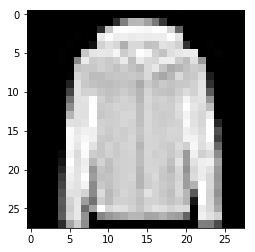

In [9]:
plt.imshow(Image.fromarray((data.train.images[0]*255).reshape([28,28])))

===========================================================================================

构建全连接神经网络，使用导入的数据集训练模型

In [10]:
with tf.Graph().as_default() as g:
    #使用占位符表达输入输出
    inputs = tf.placeholder(shape=[None,784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None,10], dtype=tf.float32)
    
    #定义神经网络模型
    out_weight = tf.Variable(tf.random_normal([784,10]))  #权重矩阵
    out_bias = tf.Variable(tf.zeros([10,]))    #偏置值使用0来初始化
    
    logits = tf.matmul(inputs,out_weight)+out_bias  #全连接神经网络
    out_put = tf.nn.softmax(logits)   #shape为【None,10】
    
    #交叉熵代价函数
    loss = tf.reduce_mean(
        -tf.reduce_sum(labels * tf.log(out_put + 1e-7),axis=1)) #批量样本的交叉熵
    #将正确率显示出来
    acc = tf.reduce_mean(tf.cast(
        tf.equal(tf.argmax(out_put,axis=1),tf.argmax(labels,axis=1)),
                tf.float32))
    
    #优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)

In [14]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(10000):
        batch_images,batch_labels = \
            data.train.next_batch(64)
        res_loss,_ = sess.run(
            [loss, train_op],
            feed_dict={
                inputs: batch_images,
                labels: batch_labels
            })
        if i % 500 == 0:
            accs = []
            for j in range(10000 // 64):
                batch_images,batch_labels = \
                    data.test.next_batch(64)
                res_acc = sess.run(acc,feed_dict={inputs:batch_images,labels: batch_labels})
                
                accs.append(res_acc)
            m_acc = np.mean(accs)
            
            print('loss %2.4f ,acc %2.2f%%' % (res_loss,m_acc * 100))
        

loss 9.3279 ,acc 9.64%
loss 4.4883 ,acc 9.88%
loss 2.4969 ,acc 9.81%
loss 3.4927 ,acc 9.73%
loss 3.2823 ,acc 9.76%
loss 2.5244 ,acc 9.96%
loss 2.7453 ,acc 9.68%
loss 2.1963 ,acc 10.01%
loss 2.0242 ,acc 9.98%
loss 1.0537 ,acc 9.61%
loss 1.2500 ,acc 9.73%
loss 1.6198 ,acc 10.09%
loss 1.4098 ,acc 10.02%
loss 1.8449 ,acc 10.00%
loss 1.3482 ,acc 10.05%
loss 1.6223 ,acc 10.28%
loss 1.6097 ,acc 10.03%
loss 1.3865 ,acc 10.45%
loss 1.7095 ,acc 10.09%
loss 1.9197 ,acc 10.26%
